<a href="https://colab.research.google.com/github/ubaiyusuf/VI/blob/master/FP_VI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARY

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import math

In [2]:
url = 'https://raw.githubusercontent.com/ubaiyusuf/VI/master/dataset.csv'
data = pd.read_csv(url)
data.head(5)


Unnamed: 0    id  ... calculated_host_listings_count  availability_365
0           0  2539  ...                              6               365
1           1  2595  ...                              2               355
2           2  3647  ...                              1               365
3           3  3831  ...                              1               194
4           4  5022  ...                              1                 0

[5 rows x 17 columns]

In [0]:
pd.value_counts(data['neighbourhood_group'])

Manhattan        21652
Brooklyn         20098
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

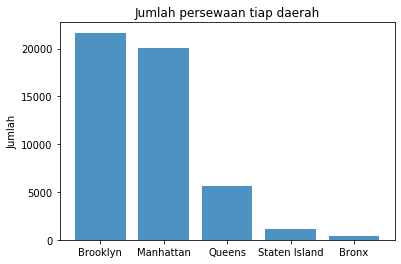

In [4]:
#BARPLOT

y_pos = np.arange(data['neighbourhood_group'].nunique())

plt.bar(y_pos, pd.value_counts(data['neighbourhood_group']), align='center', alpha=0.8)
plt.xticks(y_pos, data.neighbourhood_group.unique())
plt.ylabel('Jumlah')
plt.title('Jumlah persewaan tiap daerah')

plt.show()

In [0]:
#PIE CHART
fig = go.Figure(data=[go.Pie(labels=data.room_type.unique(), values=pd.value_counts(data['room_type']), hole=.3)])
fig.show()

In [0]:
#SCATTER
plt.scatter(data['reviews_per_month'], data['price'], c='red', alpha=0.5)
plt.title('Perbandingan rata-rata review tiap bulan dan harga')
plt.xlabel('rata-rata review per bulan')
plt.ylabel('harga sewa')
plt.show()

In [0]:
#SCATTER PLOTLY
d = [dict(
  type = 'scatter',
  x = data['availability_365'].tolist(),
  y = data['number_of_reviews'].tolist(),
  mode = 'markers',
  transforms = [dict(
    type = 'groupby',
    groups = data['neighbourhood_group'],
    styles = [
        dict(target = 'Brooklyn', value = dict(marker = dict(color = 'red'))),
        dict(target = 'Manhattan', value = dict(marker = dict(color = 'yellow'))),
        dict(target = 'Queens', value = dict(marker = dict(color = 'green'))),
        dict(target = 'Staten Island', value = dict(marker = dict(color = 'blue'))),
        dict(target = 'Bronx', value = dict(marker = dict(color = 'purple')))
    ]
  )]
)]

fig_dict = dict(data=d)
pio.show(fig_dict, validate=False)

In [0]:
#MAPBOX
fig = px.scatter_mapbox(data, lat="latitude", lon="longitude", hover_name="name", hover_data=["price", "number_of_reviews"],
                        color="room_type", color_continuous_scale='Magma', zoom=9, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [0]:
#BUBBLE CHART
fig = px.scatter(data, x="price", y="reviews_per_month",
	         size="calculated_host_listings_count", color="neighbourhood_group",
                 hover_name="name", log_x=True, size_max=60)
fig.show()